In [2]:
#Importing the required modules
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Reading the csv file
cancer_data = pd.read_csv('haberman.csv',names=['Age','Operation_Year','axil_nodes','Surv_status'])
cancer_data.head()

,Age,Operation_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
#Getting some statistical data
cancer_data.describe()

,Age,Operation_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
#Getting some more information
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age               306 non-null int64
Operation_Year    306 non-null int64
axil_nodes        306 non-null int64
Surv_status       306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


Observations:
1: There is no null value in the 4 columns which means the data is perfectly ready for analysis.
2: 25% of patients are aged below 44

# Univariate Analysis

### 1. Histograms for individual datas

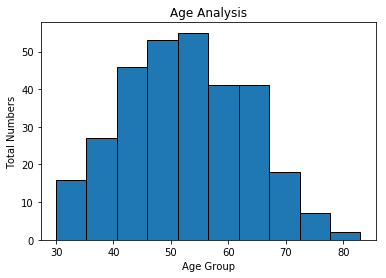

In [5]:
#Age
plt.hist(cancer_data['Age'],alpha=1,ec='black')  
plt.xlabel('Age Group')
plt.ylabel('Total Numbers')
plt.title('Age Analysis')
plt.show()

Observation: 
1.The patients were operated between age group of 30 to 83.
2.Most of the patients were between the age 50 to 56.
3.The least were between the age of 78 to 83.

Text(0.5,1,'Operation Year Analysis')

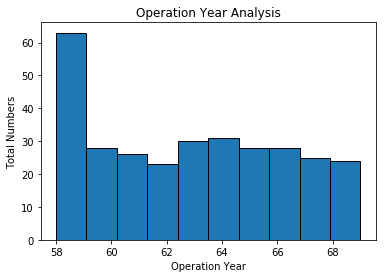

In [6]:
#Operation Year
plt.hist(cancer_data['Operation_Year'],alpha=1,ec='black')
plt.xlabel('Operation Year')
plt.ylabel('Total Numbers')
plt.title('Operation Year Analysis')

Observation: Most of the patients were operated during 1958 and 1959 as per this data set

Text(0.5,1,'Axil Nodes Analysis')

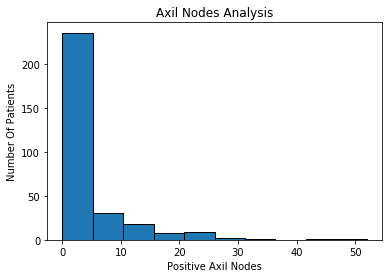

In [7]:
#Axil Nodes
plt.hist(cancer_data['axil_nodes'],alpha=1,ec='black')
plt.xlabel('Positive Axil Nodes')
plt.ylabel('Number Of Patients')
plt.title('Axil Nodes Analysis')

Observation: This shows most of the patients had 0-5 positive axilary nodes. There might be some outliers as some values lie near 50 which is far away from the other values.

### 2. PDF and analysis

F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'PDF of Age')

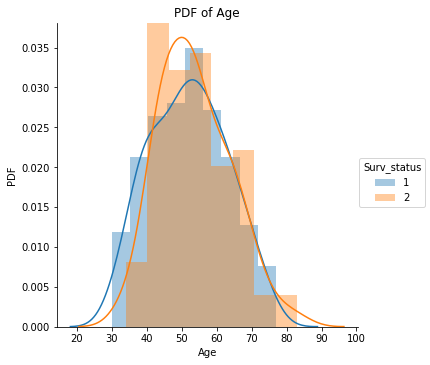

In [8]:
sns.FacetGrid(cancer_data,hue='Surv_status',size=5).map(sns.distplot,'Age').add_legend()
plt.ylabel('PDF')
plt.title('PDF of Age')

Observation: People in the age group of 20 to 40 had greater chances of survival more than 5 years.

F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


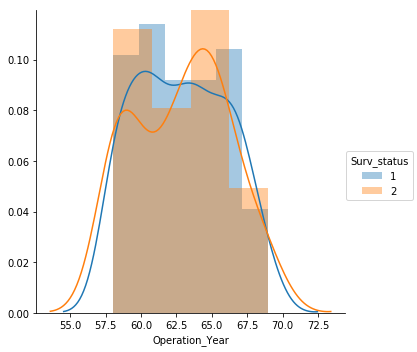

In [6]:
sns.FacetGrid(cancer_data,hue='Surv_status',size=5).map(sns.distplot,'Operation_Year').add_legend()

Observation: People operated between 1959 to 1963 had higher chances of surviving more than 5 years.

F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'PDF of Axil Nodes')

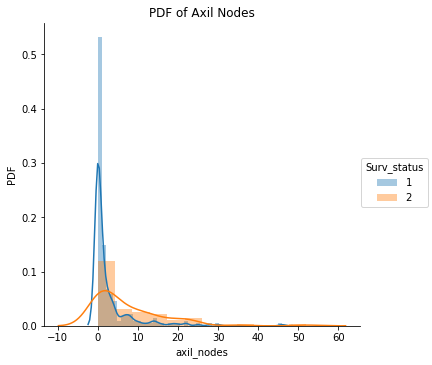

In [10]:
sns.FacetGrid(cancer_data,hue='Surv_status',size=5).map(sns.distplot,'axil_nodes').add_legend()
plt.ylabel('PDF')
plt.title('PDF of Axil Nodes')

Observation: Here patients with 0-5 positive axil nodes have a higher survival rate of 1 which is more than 5 years. More than 5 positive axil nodes have a higher chance to die between 5 years. 

# BiVariate Analysis

### 1. Comparing with axil_nodes

In [11]:
#Building the cdf
#For value 1
cancer_data_1 = cancer_data[cancer_data['Surv_status']==1]
value_counts, bin_edges = np.histogram(cancer_data_1['axil_nodes'])
pdf_1 = value_counts/sum(value_counts)
pdf_1

array([0.83555556, 0.08      , 0.02222222, 0.02666667, 0.01777778,
       0.00444444, 0.00888889, 0.        , 0.        , 0.00444444])

In [12]:
cdf_1 = np.cumsum(pdf_1)

In [13]:
#For value 2
cancer_data_2 = cancer_data[cancer_data['Surv_status']==2]
value_counts, bin_edges = np.histogram(cancer_data_2['axil_nodes'])
pdf_2 = value_counts/sum(value_counts)
pdf_2

array([0.56790123, 0.14814815, 0.13580247, 0.04938272, 0.07407407,
       0.        , 0.01234568, 0.        , 0.        , 0.01234568])

In [14]:
cdf_2 = np.cumsum(pdf_2)

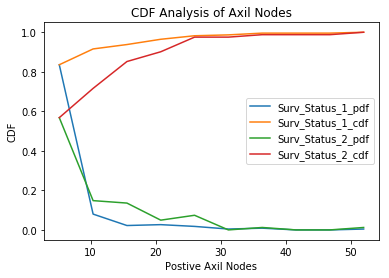

In [15]:
#Plotting pdf and cdf
plt.plot(bin_edges[1:],pdf_1,label='Surv_Status_1_pdf')
plt.plot(bin_edges[1:],cdf_1,label='Surv_Status_1_cdf')
plt.plot(bin_edges[1:],pdf_2,label='Surv_Status_2_pdf')
plt.plot(bin_edges[1:],cdf_2,label='Surv_Status_2_cdf')
plt.xlabel('Postive Axil Nodes')
plt.ylabel('CDF')
plt.title('CDF Analysis of Axil Nodes')
plt.legend()
plt.show()

Observation: 83% patients who have survived more than 5 years(Surv_status_1) had positive axil nodes between 0 and 5. 83% patients who have survived less than 5 years had positive axil nodes between 5 and 15.

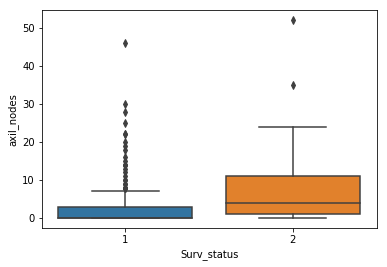

In [16]:
#Box plot for axil_nodes
sns.boxplot(data=cancer_data,x='Surv_status',y='axil_nodes')

Observation: So we can say that positive axil nodes less than 5 gives maximum chances of patient survival more than 5 years whereas more than 5 axil nodes means maximum chances of survival less than 5 years.

### 2. Comparing with Operation Year

In [17]:
#Building the cdf
#For value 1
cancer_data_1 = cancer_data[cancer_data['Surv_status']==1]
value_counts, bin_edges = np.histogram(cancer_data_1['Operation_Year'])
pdf_1 = value_counts/sum(value_counts)
pdf_1

array([0.18666667, 0.10666667, 0.10222222, 0.07111111, 0.09777778,
       0.10222222, 0.06666667, 0.09777778, 0.09333333, 0.07555556])

In [18]:
cdf_1 = np.cumsum(pdf_1)

In [19]:
#For value 2
cancer_data_2 = cancer_data[cancer_data['Surv_status']==2]
value_counts, bin_edges = np.histogram(cancer_data_2['Operation_Year'])
pdf_2 = value_counts/sum(value_counts)
pdf_2

array([0.25925926, 0.04938272, 0.03703704, 0.08641975, 0.09876543,
       0.09876543, 0.16049383, 0.07407407, 0.04938272, 0.08641975])

In [20]:
cdf_2 = np.cumsum(pdf_2)

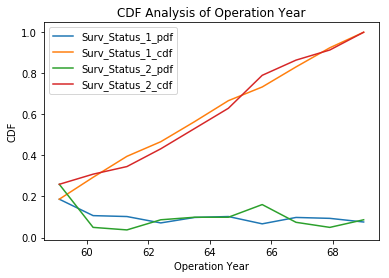

In [21]:
#Plotting pdf and cdf
plt.plot(bin_edges[1:],pdf_1,label='Surv_Status_1_pdf')
plt.plot(bin_edges[1:],cdf_1,label='Surv_Status_1_cdf')
plt.plot(bin_edges[1:],pdf_2,label='Surv_Status_2_pdf')
plt.plot(bin_edges[1:],cdf_2,label='Surv_Status_2_cdf')
plt.legend()
plt.xlabel('Operation Year')
plt.ylabel('CDF')
plt.title('CDF Analysis of Operation Year')
plt.show()

Observation: Only 20% of patients who were treated before 1959 had a survival rate more than 5 years while it increased to 60% in 1964. 

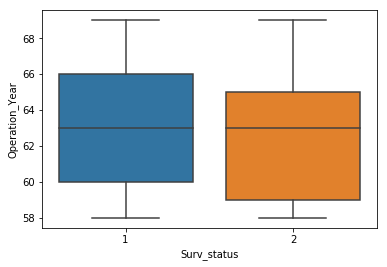

In [22]:
#Box plot for Operation_Year
sns.boxplot(data=cancer_data,x='Surv_status',y='Operation_Year')

Observation: This clearly shows patients who were treated before 1963 have more chances of surviving less than 5 years and the survival rate improved when treatment started after 1963.

### 3. Comparing with Age

In [23]:
#Building the cdf
#For value 1
cancer_data_1 = cancer_data[cancer_data['Surv_status']==1]
value_counts, bin_edges = np.histogram(cancer_data_1['Age'])
pdf_1 = value_counts/sum(value_counts)
pdf_1

array([0.05333333, 0.10666667, 0.12444444, 0.09333333, 0.16444444,
       0.16444444, 0.09333333, 0.11111111, 0.06222222, 0.02666667])

In [24]:
cdf_1 = np.cumsum(pdf_1)

In [25]:
#For value 2
cancer_data_2 = cancer_data[cancer_data['Surv_status']==2]
value_counts, bin_edges = np.histogram(cancer_data_2['Age'])
pdf_2 = value_counts/sum(value_counts)
pdf_2

array([0.03703704, 0.12345679, 0.19753086, 0.19753086, 0.13580247,
       0.12345679, 0.09876543, 0.04938272, 0.02469136, 0.01234568])

In [26]:
cdf_2 = np.cumsum(pdf_2)

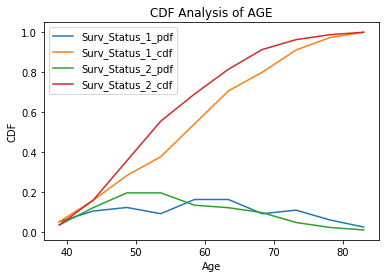

In [27]:
#Plotting pdf and cdf
plt.plot(bin_edges[1:],pdf_1,label='Surv_Status_1_pdf')
plt.plot(bin_edges[1:],cdf_1,label='Surv_Status_1_cdf')
plt.plot(bin_edges[1:],pdf_2,label='Surv_Status_2_pdf')
plt.plot(bin_edges[1:],cdf_2,label='Surv_Status_2_cdf')
plt.legend()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.title('CDF Analysis of AGE')
plt.show()

 Observation: 75% of patients lived more then 5 years who were less than 60 years of Age. 

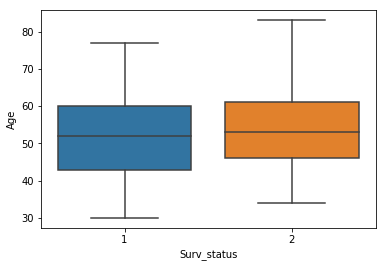

In [28]:
#Box plot for Age
sns.boxplot(data=cancer_data,x='Surv_status',y='Age')

Observation: 75% of people lived more than 5years who were less than 60 years of age.

# MultiVariate Analysis

In [31]:
cancer_data_pair = cancer_data.copy()
cancer_data_pair.Surv_status = cancer_data_pair.Surv_status.map({1:'>5 Years',2:'<5 Years'})
cancer_data_pair.head()

,Age,Operation_Year,axil_nodes,Surv_status
0,30,64,1,>5 Years
1,30,62,3,>5 Years
2,30,65,0,>5 Years
3,31,59,2,>5 Years
4,31,65,4,>5 Years


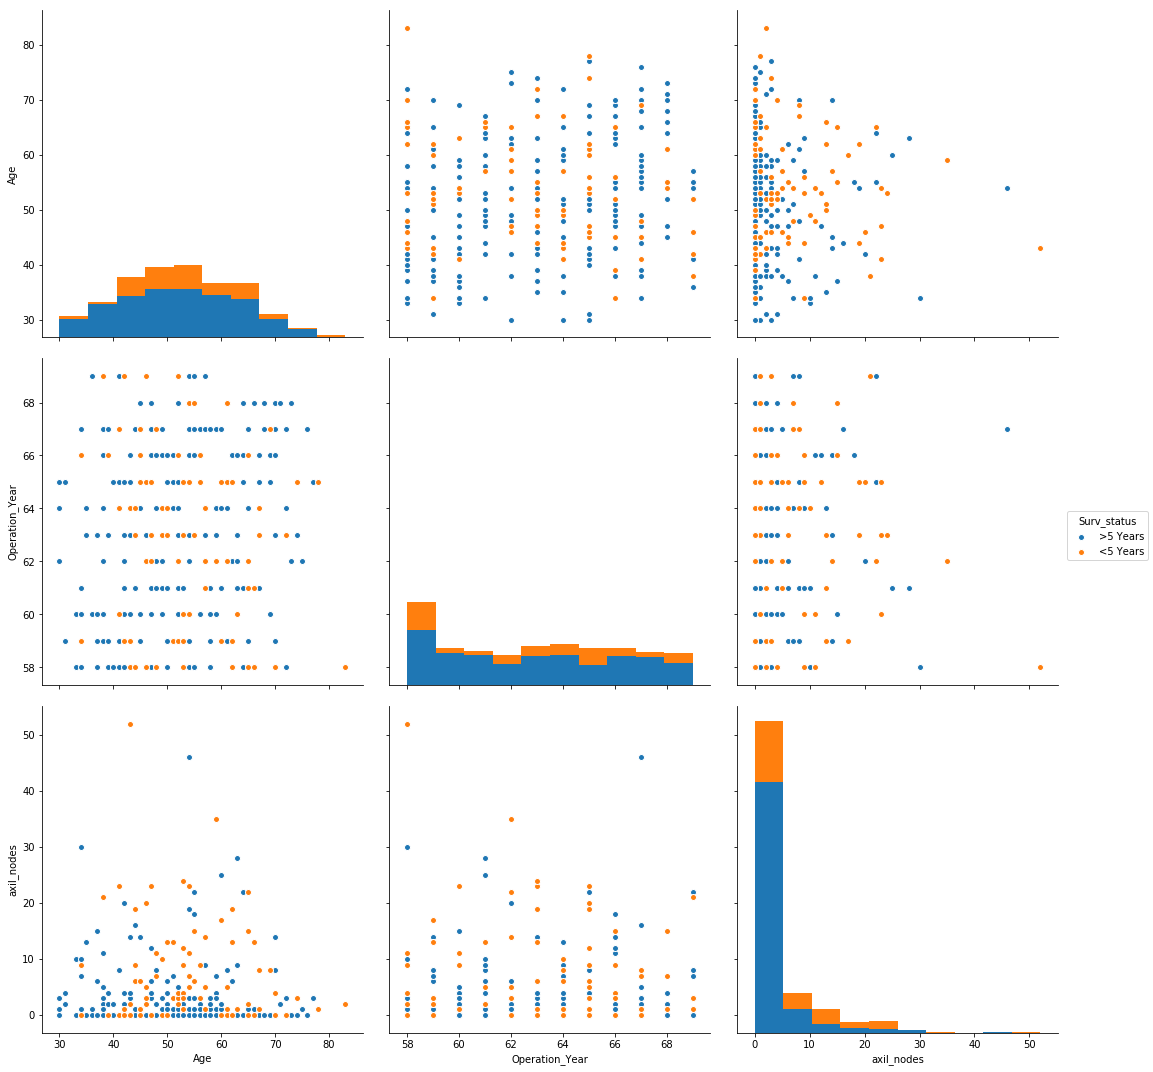

In [38]:
sns.pairplot(cancer_data_pair,hue='Surv_status',size=5)

Observation: This graph clearly shows during the initial operation years of 1958-1960 there were higher chances of people surviving less than 5 years. Higher the age, there are more chances of having more positive axial nodes.

# Conclusion

### 1. 75% People lived more than 5 years who were less than 60 years of age.
### 2. People who were operated after 1963 had better chances of survival more than 5 years.
### 3. People who had less than 5 Positive axil Nodes are more likely to survive more than 5 years.